<h2>Importing Libary<h2>

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

<h2>Training Image Preprocessing<h2> 

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'G:\\Fruit and veg\\Fruit_recognition\\archive (1)\\train',
    labels='inferred',  #labels are generated from the directory structure
    label_mode='categorical', #means data can be anything img,strings,etc encode as a categorical vector
    class_names=None, #to control order
    color_mode='rgb', #type of image color
    batch_size=32, #the number of samples  to estimate the error gradient before the model weight are updated
    image_size=(64, 64), #image size pixel x pixel
    shuffle=True, #select samples at random
    seed= None, #to save the seed of model so it can produce same result
    validation_split= None, #to split data for validation
    subset= None, #this return dataset of training data or validation data or both if validation is set
    interpolation='bilinear', #to estimate the values of unknown data points that fall in between existing, known data points.
    follow_links=False, #if you want to follow other links
    crop_to_aspect_ratio=False #will change the aspect ratio of an image if it doesn't match the targeted images ratio (when True)
)


Found 3115 files belonging to 36 classes.


<h2>Validation Image Preprocessing<h2>

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'G:\\Fruit and veg\\Fruit_recognition\\archive (1)\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 351 files belonging to 36 classes.


<h2>Building Model<h2>

In [6]:
cnn = tf.keras.models.Sequential()

<h2>Building Convolution Layers<h2>

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) #we are dropping some neuron to avoid overfitting

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) 

<h2>Compiling and Training Phase<h2>

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=('accuracy'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [33]:
train_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32


98/98 [==============================] - 41s 390ms/step - loss: 0.7805 - accuracy: 0.7807 - val_loss: 1.1555 - val_accuracy: 0.8120
Epoch 2/32
98/98 [==============================] - 41s 398ms/step - loss: 0.7531 - accuracy: 0.7862 - val_loss: 1.0117 - val_accuracy: 0.8234
Epoch 3/32
98/98 [==============================] - 39s 374ms/step - loss: 0.7235 - accuracy: 0.7981 - val_loss: 1.0751 - val_accuracy: 0.8063
Epoch 4/32
98/98 [==============================] - 37s 357ms/step - loss: 0.7553 - accuracy: 0.7920 - val_loss: 0.9753 - val_accuracy: 0.8376
Epoch 5/32
98/98 [==============================] - 36s 342ms/step - loss: 0.7137 - accuracy: 0.7974 - val_loss: 1.0447 - val_accuracy: 0.8177
Epoch 6/32
98/98 [==============================] - 35s 337ms/step - loss: 0.6251 - accuracy: 0.8215 - val_loss: 1.1699 - val_accuracy: 0.8006
Epoch 7/32
98/98 [==============================] - 38s 368ms/step - loss: 0.6851 - accuracy: 0.8112 - val_loss: 1.0800 - val_accuracy: 0.8091
Epoch 8/32

<h2>Saving Model<h2>

In [34]:
cnn.save('trained_model.h5')

In [35]:
train_history.history #Return Dictionary of history

{'loss': [0.780478835105896,
  0.7530649900436401,
  0.7234881520271301,
  0.7552514672279358,
  0.7136840224266052,
  0.6251446604728699,
  0.6851490139961243,
  0.6552417874336243,
  0.6483237743377686,
  0.6043605208396912,
  0.5478896498680115,
  0.5849120020866394,
  0.5365715026855469,
  0.5633919835090637,
  0.5440511703491211,
  0.5435839295387268,
  0.4896296560764313,
  0.5086402893066406,
  0.6099722385406494,
  0.43774011731147766,
  0.4533880650997162,
  0.5094302296638489,
  0.38192567229270935,
  0.3519041836261749,
  0.33459022641181946,
  0.37137991189956665,
  0.42212894558906555,
  0.3232055902481079,
  0.35312485694885254,
  0.371213436126709,
  0.37285909056663513,
  0.33800995349884033],
 'accuracy': [0.780738353729248,
  0.7861958146095276,
  0.7980738282203674,
  0.7919743061065674,
  0.7974317669868469,
  0.8215088248252869,
  0.8112359642982483,
  0.8231139779090881,
  0.8170144557952881,
  0.8314606547355652,
  0.8452648520469666,
  0.8417335748672485,
  0.84

In [36]:
#recording History 
import json
with open('training_history.json','w') as f:
    json.dump(train_history.history,f)

In [37]:
print(train_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<h2>Calculating Accuracy of Model Achieved on Validation set<h2>

In [38]:
print('validation set Accuracy: {} %'.format(train_history.history['val_accuracy'][-1]*100))

validation set Accuracy: 89.45869207382202 %


<h2>Accuracy Visualization<h2>

<h2>Training Visualization

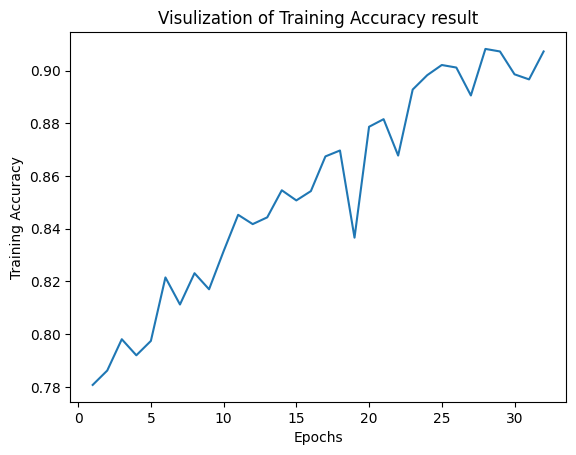

In [39]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,train_history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visulization of Training Accuracy result')
plt.show()

<h2>Validation Accuracy<h2>

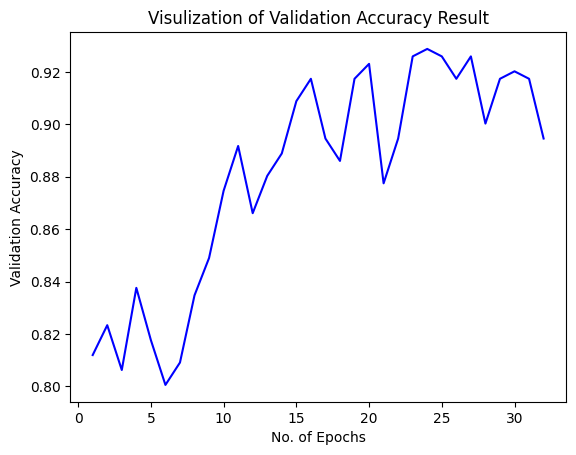

In [40]:
plt.plot(epochs,train_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visulization of Validation Accuracy Result')
plt.show()

In [41]:
training_loss,training_accuracy = cnn.evaluate(training_set)

98/98 [==============================] - 24s 217ms/step - loss: 0.3686 - accuracy: 0.9082


In [42]:
training_accuracy

0.9081861972808838

In [43]:
val_loss,val_accuracy = cnn.evaluate(validation_set)

11/11 [==============================] - 4s 90ms/step - loss: 1.0539 - accuracy: 0.8946


In [44]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'G:\\Fruit and veg\\Fruit_recognition\\archive (1)\\test',
    labels='inferred',  #labels are generated from the directory structure
    label_mode='categorical', #means data can be anything img,strings,etc encode as a categorical vector
    class_names=None, #to control order
    color_mode='rgb', #type of image color
    batch_size=32, #the number of samples  to estimate the error gradient before the model weight are updated
    image_size=(64, 64), #image size pixel x pixel
    shuffle=True, #select samples at random
    seed= None, #to save the seed of model so it can produce same result
    validation_split= None, #to split data for validation
    subset= None, #this return dataset of training data or validation data or both if validation is set
    interpolation='bilinear', #to estimate the values of unknown data points that fall in between existing, known data points.
    follow_links=False, #if you want to follow other links
    crop_to_aspect_ratio=False #will change the aspect ratio of an image if it doesn't match the targeted images ratio (when True)
)

Found 359 files belonging to 36 classes.


In [45]:
test_loss,test_accuracy = cnn.evaluate(training_set)

98/98 [==============================] - 24s 223ms/step - loss: 0.3686 - accuracy: 0.9082


In [46]:
test_accuracy

0.9081861972808838